#

##

Number of iteration at Jacobi Method is : 572


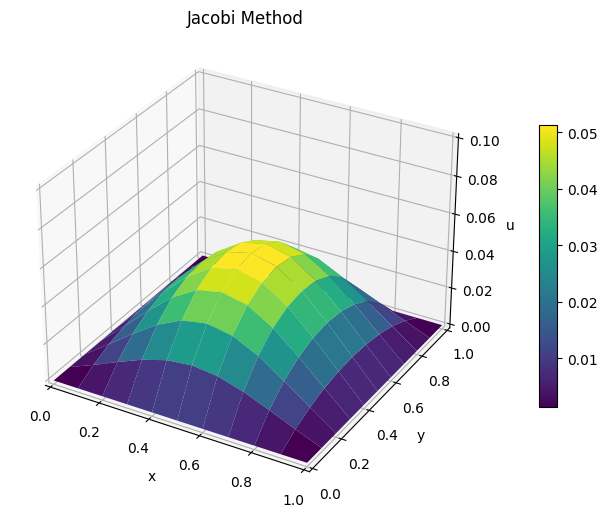

Number of iteration at Gauss-Seidel Method is : 294


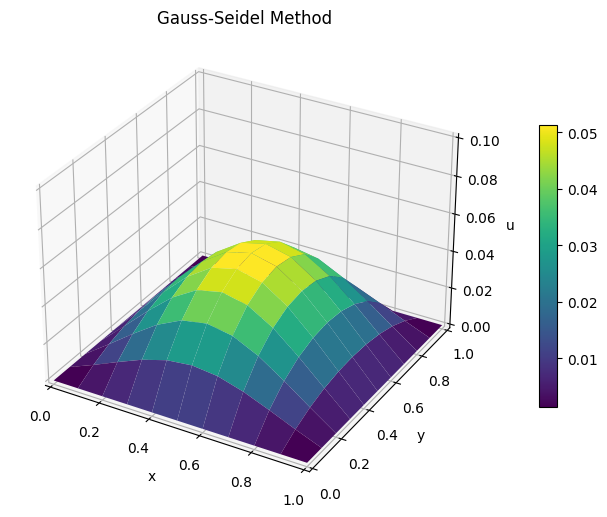

Number of iteration at SOR Method is : 55


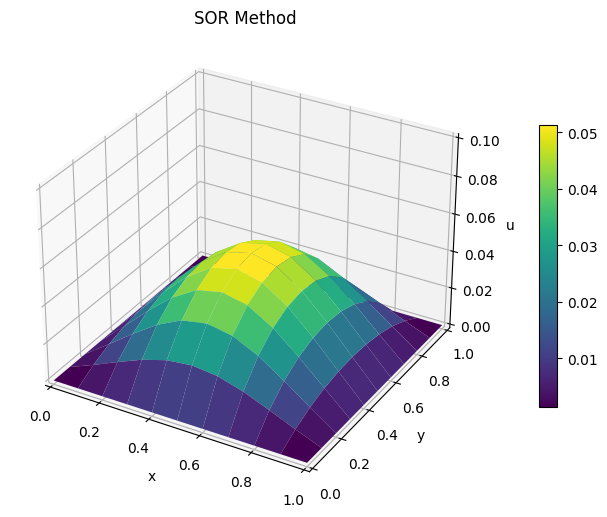

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm

''' 1. Set grid '''
h = 0.1
x, y = np.arange(0, 1+h, h), np.arange(0, 1+h, h)
nx, ny = np.size(x), np.size(y)
X, Y = np.meshgrid(x, y, indexing='ij')
u = np.zeros((nx, ny))

''' 2. Define function '''
def f(x, y):
    return np.sin(np.pi*x) * np.sin(np.pi*y)

''' 3. Boundary Condition '''
def setBc(u):
    u[:,-1] = 0      # Top
    u[:,0] = 0       # Bottom
    u[0,:] = 0       # Left
    u[-1,:] = 0      # Right

''' 4. Jacobi Method '''
def jacobi(u, epsilon=1e-15, max_iter=1000):
    iter, residual = 0, 1
    unew = np.copy(u)
    while iter < max_iter and residual > epsilon:
        for i in range(1, nx-1):
            for j in range(1, ny-1):
                unew[i,j] = (u[i+1,j] + u[i-1,j] + u[i,j+1] + u[i,j-1] - f(x[i], y[i])*h**2)/4
        residual = np.max(np.abs(unew - u))
        u = np.copy(unew)
        setBc(u)
        iter += 1
    print("Number of iteration at Jacobi Method is :", iter)
    return u

''' 5. Gauss-Seidel Method '''
def gauss_seidel(u, epsilon=1e-15, max_iter=1000):
    iter, residual = 0, 1
    while iter < max_iter and residual > epsilon:
        uold = np.copy(u)
        for i in range(1, nx-1):
            for j in range(1, ny-1):
                u[i,j] = (u[i+1,j] + u[i-1,j] + u[i,j+1] + u[i,j-1] - f(x[i], y[i])*h**2)/4
        residual = np.max(np.abs(u - uold))
        setBc(u)
        iter += 1
    print("Number of iteration at Gauss-Seidel Method is :", iter)
    return u

''' 6. Gauss-Seidel method with successive over-relaxation Method '''
def SOR(u, epsilon=1e-15, max_iter=1000):
    iter, residual = 0, 1
    w = 1.54
    uold = np.copy(u)
    while iter < max_iter and residual > epsilon:
        for i in range(1, nx-1):
            for j in range(1, ny-1):
                uold[i,j] = u[i,j]
                u[i,j] = (u[i+1,j] + u[i-1,j] + u[i,j+1] + u[i,j-1] - f(x[i], y[i])*h**2)/4
                u[i,j] = uold[i,j] + w*(u[i,j] - uold[i,j])
        residual = np.max(np.abs(u - uold))
        setBc(u)
        iter += 1
    print("Number of iteration at SOR Method is :", iter)
    return u

''' 6. Plot '''
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, np.abs(jacobi(u)), cmap='viridis')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 0.1)
fig.colorbar(surf, shrink=0.6, aspect=15)
plt.tight_layout()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
plt.title('Jacobi Method')
plt.show()
u = np.zeros((nx, ny))
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, np.abs(gauss_seidel(u)), cmap='viridis')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 0.1)
fig.colorbar(surf, shrink=0.6, aspect=15)
plt.tight_layout()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
plt.title('Gauss-Seidel Method')
plt.show()
u = np.zeros((nx, ny))
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, np.abs(SOR(u)), cmap='viridis')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 0.1)
fig.colorbar(surf, shrink=0.6, aspect=15)
plt.tight_layout()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
plt.title('SOR Method')
plt.show()

##

Number of iteration at Jacobi Method is : 572
Number of iteration at Gauss-Seidel Method is : 294
Number of iteration at SOR Method is : 55
L1 Norm error at Jacobi Method = 0.20113724192845475
L1 Norm error at Gauss-Seidel Method = 0.2011372419287285
L1 Norm error at SOR Method = 0.20113724192895938


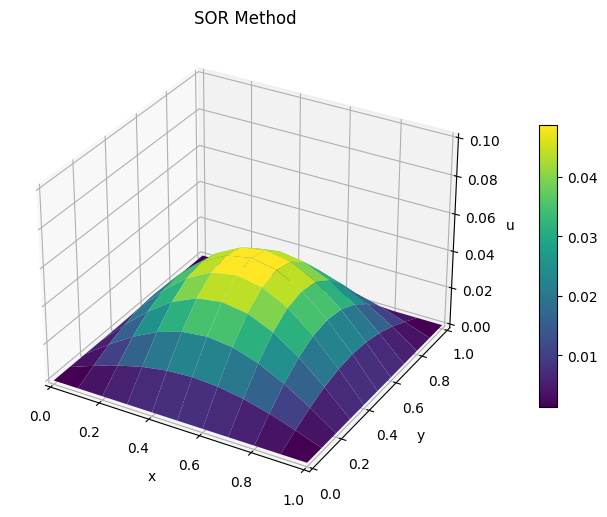

In [34]:
import numpy as np
import matplotlib.pyplot as plt

''' 1. Set grid '''
h = 0.1
x, y = np.arange(0, 1+h, h), np.arange(0, 1+h, h)
nx, ny = np.size(x), np.size(y)
X, Y = np.meshgrid(x, y, indexing='ij')
u = np.zeros((nx, ny))

''' 2. Define function '''
def f(x, y):
    return np.sin(np.pi*x) * np.sin(np.pi*y)

''' 3. Boundary Condition '''
def setBc(u):
    u[:,-1] = 0      # Top
    u[:,0] = 0       # Bottom
    u[0,:] = 0       # Left
    u[-1,:] = 0      # Right

    return

''' 4. Direct Solution '''
A = np.zeros(shape=(nx,ny,nx,ny),dtype='d')
b = np.zeros(shape=(nx,ny),dtype='d')

for i in range(1,nx-1):
    for j in range(1,ny-1):
        A[i,j,i-1,j] = A[i,j,i+1,j] = A[i,j,i,j-1] = A[i,j,i,j+1] = 1/h**2
        A[i,j,i,j] = -4/h**2
        
for i in range(0,nx):
    A[0,i,0,i] = A[-1,i,-1,i] = A[i,0,i,0] = A[i,-1,i,-1] = 1

for i in range(1,nx-1):
    for j in range(1,ny-1):
        b[i,j] = f(x[i],y[j])

u_exact = np.linalg.tensorsolve(A, b)

ej = np.sum(np.abs(u_exact-jacobi(u)))
eg = np.sum(np.abs(u_exact-gauss_seidel(u)))
es = np.sum(np.abs(u_exact-SOR(u)))

print("L1 Norm error at Jacobi Method =", ej)
print("L1 Norm error at Gauss-Seidel Method =", eg)
print("L1 Norm error at SOR Method =", es)

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, np.abs(u_exact), cmap='viridis')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 0.1)
fig.colorbar(surf, shrink=0.6, aspect=15)
plt.tight_layout()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
plt.title('SOR Method')
plt.show()

#

##

Number of iteration at SOR Method is : 55


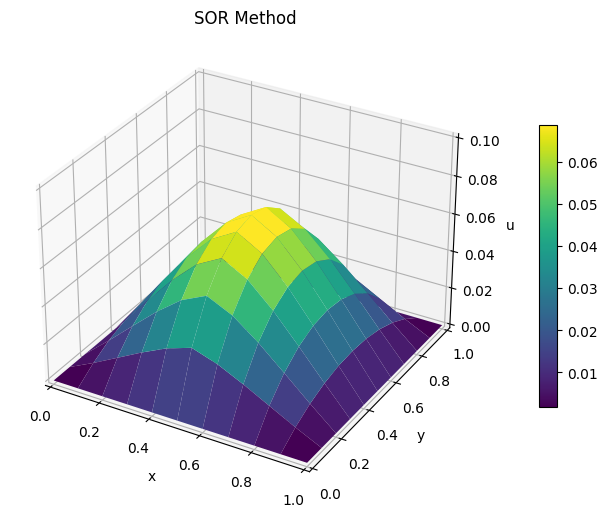

In [28]:
def SOR1(u, epsilon=1e-15, max_iter=1000):
    iter = 0
    beta = 1.54
    u_new = u.copy()
    residual = 1
    setBc(u)
    
    while iter < max_iter and residual > epsilon:
        for i in range(1, nx-1):
            for j in range(1, ny-1):
                u_new[i,j] = beta*(u[i+1,j] + u_new[i-1,j] + u[i,j+1]\
    + u_new[i,j-1] - (f1(x[i], y[i]) + f2(x[i], y[i]))*h**2)/4 + (1-beta)*u[i,j]

        residual = np.max(np.abs(u_new - u))
        u = np.copy(u_new)
        iter += 1

    print("Number of iteration at SOR Method is :", iter)
    
    return u


fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, np.abs(SOR1(u)), cmap='viridis')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 0.1)
fig.colorbar(surf, shrink=0.6, aspect=15)
plt.tight_layout()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
plt.title('SOR Method')
plt.show()

##

Number of iteration at SOR Method is : 54


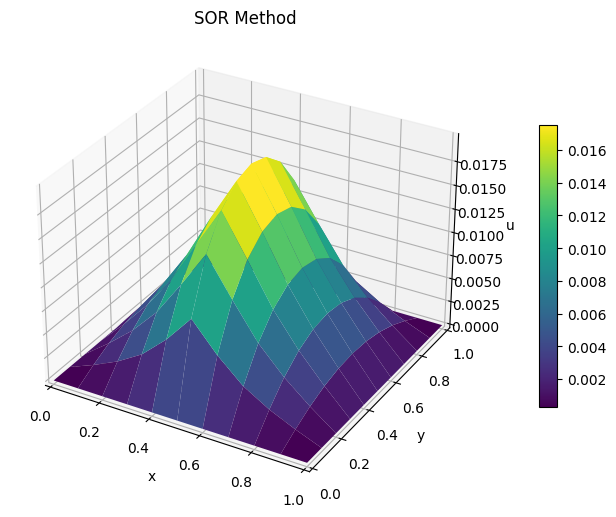

In [30]:
def SOR2(u, epsilon=1e-15, max_iter=1000):
    iter = 0
    beta = 1.54
    u_new = u.copy()
    residual = 1
    setBc(u)
    
    while iter < max_iter and residual > epsilon:
        for i in range(1, nx-1):
            for j in range(1, ny-1):
                u_new[i,j] = beta*(u[i+1,j] + u_new[i-1,j] + u[i,j+1]\
    + u_new[i,j-1] - f2(x[i], y[i])*h**2)/4 + (1-beta)*u[i,j]

        residual = np.max(np.abs(u_new - u))
        u = np.copy(u_new)
        iter += 1

    print("Number of iteration at SOR Method is :", iter)
    
    return u


fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, np.abs(SOR2(u)), cmap='viridis')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
fig.colorbar(surf, shrink=0.6, aspect=15)
plt.tight_layout()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
plt.title('SOR Method')
plt.show()

##

Number of iteration at SOR Method is : 55
Number of iteration at SOR Method is : 54


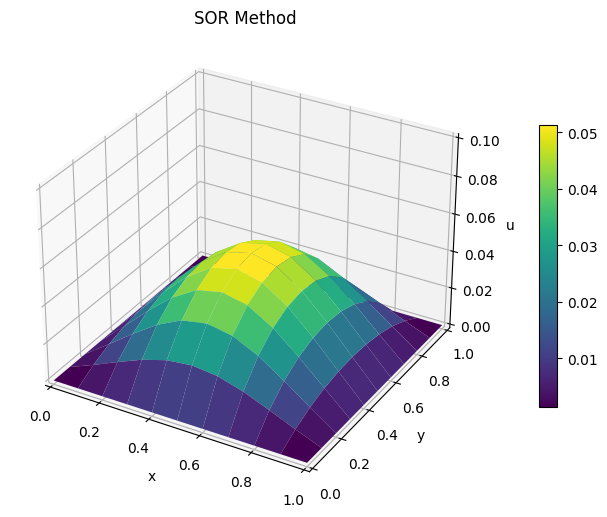

In [37]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, np.abs(SOR1(u)-SOR2(u)), cmap='viridis')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 0.1)
fig.colorbar(surf, shrink=0.6, aspect=15)
plt.tight_layout()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
plt.title('SOR Method')
plt.show()